In [1]:
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf 
import tensorflow_io as tfio 
import tqdm

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


In [4]:
number_of_patients=len(df.Patient.unique())

In [5]:
image_paths=[]
from os.path import join,getsize
for path,dirname,fname in os.walk(top="train",topdown=True):
    for filename in fname:
        image_paths.append(os.path.join(path,filename))
        

In [6]:
def decode_image(image_path):
    image_bytes = tf.io.read_file(image_path)
    image = tfio.image.decode_dicom_image(image_bytes, dtype=tf.uint16)
    image=np.squeeze(image.numpy())
    return image

In [7]:
#TO_GENERATE_TIMELAPSE_CTSCANS

def choose_patient(ID):
    images_x=[]
    for i in image_paths:
        name=str(i)
        if str(ID) in name:
            images_x.append(i)
    images_x.sort()
    return imgaes_x

def generate_patient_movie(images):
    for x,i in enumerate(images_x):
        image=decode_image(i)   
        fname=str(x)+".png"
        plt.imsave(fname,image,cmap='twilight_shifted')    

def save():
    os.system("ffmpeg -r 1 -i img%01d.png -vcodec mpeg4 -y movie.mp4")
 

In [13]:
def show_scan(image):
    img = decode_image(image)
    patient_name=str(image).split('/')[1]
    fig, ax = plt.subplots()
    im=ax.imshow(img,cmap='twilight')
    plt.axis('off')
    plt.title("Scan of Patient {}".format(patient_name))
    plt.rcParams["figure.figsize"] = [3,9]
    plt.show()

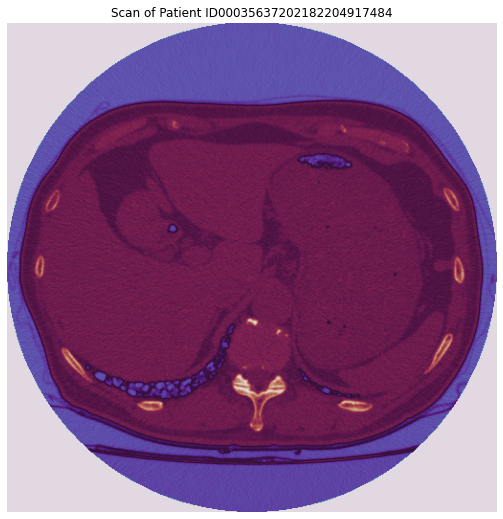

In [14]:
show_scan(image_paths[0])